<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Medias_muestrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerias**

In [174]:

import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

# **Monte Carlo de la Media Muestral**

## **Algoritmo**

**Definir g(x):**

$g(x) = \sqrt{arctan(x)}$

***PASO 1:***
Generar la secuencia de $ [U_{i}]_{i=1}^{n} \sim$ $Unif(0,1)$

In [175]:
# Tomaremos n = 50
n = 50
#Lista_Ui-> Lista donde se guardaran todos los Ui generados
Lista_Ui=[]
for i in range(n):
  Ui=rnd.random()
  Lista_Ui.append(Ui)

***PASO 2:***
Calcular $ X_{i} = a + U_{i}(b -a )$


In [176]:
# De acuerdo al ejercicio:
#a -> Límite inferior de la integral
a = 0
#b -> Límite superior de la integral
b = 1
#Lista_Xi-> Lista donde se guardaran todos los Xi calculados
Lista_Xi=[]
for i in range(n):
  Xi= a + Lista_Ui[i]*(b-a)
  Lista_Xi.append(Xi)

***PASO 3:***
Calcular $g$ $( X_{i} )$


In [177]:
#Lista_gi-> Lista donde se guardaran todos los g(Xi) calculados
Lista_gi=[]
for i in range(n):
  gi= np.sqrt(np.arctan(Lista_Xi[i]))
  Lista_gi.append(gi)

***PASO 4:***
Estimar $I$ calculando la media muestral $\theta _{1}$


$\theta _{1}$ = $(b-a) \frac{1}{n} \sum_{i=1}^{n}g(X_{i})$


In [178]:
#Calcular la suma de todas las g(Xi)
#--sum_gi-> Suma de las g(Xi)
sum_gi=sum(Lista_gi)
#Calcular el estimador
estimador = (b-a)*(1/n)*(sum_gi)
print("El valor estimado de I es",estimador)

El valor estimado de I es 0.6172693794813142


## **Generar el algortimo N veces**

**Funcion**

In [179]:
def Fun_Media_muestral(N):
  #Limites de integracion
  a=0
  b=1
  #Numero de Ui generados
  n=50
  #Lista_esti -> Lista donde se guardaran todos los estimadores calculados
  Lista_esti =[]
  for i in range(N):
    #Lista_Ui-> Lista donde se guardaran todos los Ui generados
    Lista_Ui=[]
    for i in range(n):
      Ui=rnd.random()
      Lista_Ui.append(Ui)
    #Lista_Xi-> Lista donde se guardaran todos los Xi calculados
    Lista_Xi=[]
    for i in range(n):
      Xi= a + Lista_Ui[i]*(b-a)
      Lista_Xi.append(Xi)
    #Lista_gi-> Lista donde se guardaran todos los g(Xi) calculados
    Lista_gi=[]
    for i in range(n):
      gi= np.sqrt(np.arctan(Lista_Xi[i]))
      Lista_gi.append(gi)
    #--sum_gi-> Suma de las g(Xi)
    sum_gi=sum(Lista_gi)
    #Calcular el estimador
    estimador = (b-a)*(1/n)*(sum_gi)
    Lista_esti.append(estimador)
  return Lista_esti


**Histograma**

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,
         1.,  2.,  0.,  2.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,  0.,
         1.,  2.,  0.,  2.,  0.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,  2.,
         2.,  2.,  1.,  2.,  1.,  1.,  2.,  3.,  0.,  1.,  2.,  1.,  3.,
         3.,  3.,  0.,  3.,  2.,  3.,  4.,  4.,  2.,  2.,  5.,  2.,  0.,
         3.,  1.,  1.,  5.,  6.,  1.,  2.,  2.,  1.,  6.,  5.,  6.,  2.,
         6.,  2.,  1.,  3.,  5.,  5.,  3.,  3.,  4.,  4.,  2.,  6.,  3.,
         3.,  4.,  6.,  8.,  6.,  6.,  6.,  5.,  9.,  4.,  8.,  4.,  7.,
         6.,  5.,  7.,  4.,  9.,  9.,  6., 10., 14.,  8.,  4.,  8., 12.,
        10.,  9., 13., 10.,  9.,  9.,  7., 14., 16., 25., 14.,  9.,  9.,
        11., 19., 10., 14., 10., 11., 17., 15., 14.

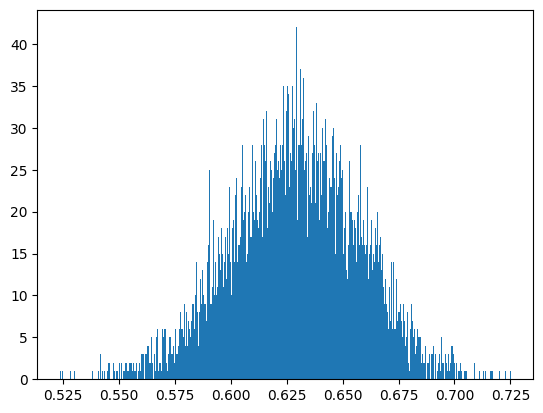

In [180]:
# N -> Número de experimentos con n iteracciones
N =5000
G = Fun_Media_muestral(N)
plt.hist(G,bins=500)

## **Intervalos de confianza de 95%**

Calcular los intervalos de confianza

$\bar{x} -\frac{S}{\sqrt{N}}t_{N-1,\frac{\alpha}{2}}\leq \mu \leq \bar{x} + \frac{S}{\sqrt{N}}t_{N-1,\frac{\alpha}{2}} $

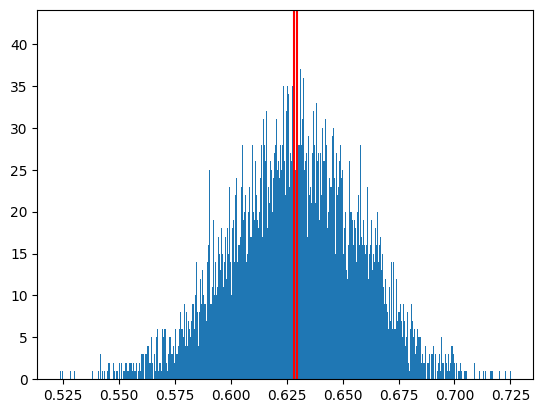

In [181]:
# Confianza -> Nivel de confianza de la prueba (95%)
Confianza = 0.95
# Gl-> Grados de libertad
Gl = len(G) - 1
# Media y desviación estándar de la muestra
media_muestra = np.mean(G)
desviacion_muestra = np.std(G, ddof=1)
# Val_cri ->  Valor crítico de t (a/2,N-1)
Val_cri = stats.t.ppf((1 - Confianza) / 2, Gl)
# e_estandar ->  Error estándar
e_estandar = desviacion_muestra / np.sqrt(len(G))
# Límites del intervalo de confianza
inter_inferior = media_muestra - Val_cri * e_estandar
inter_superior = media_muestra + Val_cri * e_estandar
plt.hist(G,bins=500)
plt.axvline(inter_inferior,color="red")
plt.axvline(inter_superior,color="red")

# **Monte Carlo de Acierto y Error**

## **Algoritmo**

**Definir g(x):**

$g(x) = \sqrt{arctan(x)}$

***PASO 1:***
Paso 1: Generar una secuencia. $ [U_{i}]_{i=1}^{2n} \sim$ $Unif(0,1)$

In [182]:
# Tomaremos n = 50
n = 50
#Lista_Uis-> Lista donde se guardaran todos los Ui generados
Lista_Uis=[]
for i in range(2*n):
  Ui=rnd.random()
  Lista_Uis.append(Ui)


***PASO 2:***
Conformar pares $(U_{i},U_{n+i})$ para $i = 1,2,...,n$




In [183]:
#Lista_Ui-> Lista de los Ui con i=1,2,..,n
Lista_Ui=[]
#Lista_Un_i-> Lista de los Un+i con i=1,2,..,n
Lista_Un_i=[]
for i in range(n):
  Ui=Lista_Uis[i]
  Lista_Ui.append(Ui)
  Un_i=Lista_Uis[n+i]
  Lista_Un_i.append(Un_i)




**Paso 3:** Calcular $X_{i} = a + U_{i}(b − a)$ para $i = 1,2,...,n$

In [184]:
# De acuerdo al ejercicio:
#a -> Límite inferior de la integral
a = 0
#b -> Límite superior de la integral
b = 1
#Lista_Xi-> Lista donde se guardaran todos los Xi calculados
Lista_Xi=[]
for i in range(n):
  Xi= a + Lista_Ui[i]*(b-a)
  Lista_Xi.append(Xi)

***PASO 4:***
Calcular $g$ $( X_{i} )$


In [185]:
#Lista_gi-> Lista donde se guardaran todos los g(Xi) calculados
Lista_gi=[]
for i in range(n):
  gi= np.sqrt(np.arctan(Lista_Xi[i]))
  Lista_gi.append(gi)

***PASO 5:***
Contar los aciertos $n_{a}$ tales que $g(Xi) > cU_{n+i}$ con c = 1 $⟶$ $g(Xi) > U_{n+i}$ para $i = 1,2,...,n$ y gráficar experimento:
.

n_a = 34


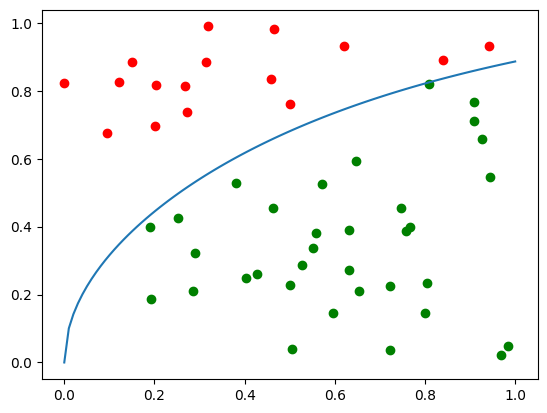

In [186]:
#Grafica de g(x)
x=np.linspace(0,1,100)
plt.plot(x,np.sqrt(np.arctan(x)))
#n_a -> Número de aciertos (exitos)
n_a = 0
for i in range(n):
  g_xi=Lista_gi[i]
  Un_i=Lista_Un_i[i]
  if g_xi > Un_i:
    plt.scatter(Lista_Ui[i],Un_i,color="green")
    n_a=n_a+1
  else:
    plt.scatter(Lista_Ui[i],Un_i,color="red")
print("n_a =",n_a)

***PASO 6:***
Estimar $I$ calculando la media muestral $\theta _{2}$


$\theta _{2}$ = $c(b-a) \frac{n_{a}}{n} $ si $c=1$ entonces, $\theta _{2}$ = $(b-a) \frac{n_{a}}{n} $


In [187]:
#Calcular estimador
#a -> Límite inferior de la integral
a = 0
#b -> Límite superior de la integral
b = 1
estimador = (b-a)*(n_a/n)
print("El valor estimado de I es",estimador)

El valor estimado de I es 0.68


## **Generar el algortimo N veces**

**Funcion**

In [188]:
def Fun_Acierto_Error(N):
  #Limites de integracion
  a=0
  b=1
  #Numero de Ui generados
  n=50
  #Lista_esti -> Lista donde se guardaran todos los estimadores calculados
  Lista_esti =[]
  for i in range(N):
    #Lista_Uis-> Lista donde se guardaran todos los Ui generados
    Lista_Uis=[]
    for i in range(2*n):
      Ui=rnd.random()
      Lista_Uis.append(Ui)
    #Lista_Ui-> Lista de los Ui con i=1,2,..,n
    Lista_Ui=[]
    #Lista_Un_i-> Lista de los Un+i con i=1,2,..,n
    Lista_Un_i=[]
    for i in range(n):
      Ui=Lista_Uis[i]
      Lista_Ui.append(Ui)
      Un_i=Lista_Uis[n+i]
      Lista_Un_i.append(Un_i)
    #Lista_Xi-> Lista donde se guardaran todos los Xi calculados
    Lista_Xi=[]
    for i in range(n):
      Xi= a + Lista_Ui[i]*(b-a)
      Lista_Xi.append(Xi)
    #Lista_gi-> Lista donde se guardaran todos los g(Xi) calculados
    Lista_gi=[]
    for i in range(n):
      gi= np.sqrt(np.arctan(Lista_Xi[i]))
      Lista_gi.append(gi)
    #n_a -> Número de aciertos (exitos)
    n_a = 0
    for i in range(n):
      g_xi=Lista_gi[i]
      Un_i=Lista_Un_i[i]
      if g_xi > Un_i:
        n_a=n_a+1
    #Calcular estimador
    estimador = (b-a)*(n_a/n)
    Lista_esti.append(estimador)
  return Lista_esti

**Histograma**

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,
          3.,   0.,   0.,  15.,   0.,   0.,   0.,  22.,   0.,   0.,   0.,
         62.,   0.,   0., 101.,   0.,   0.,   0., 205.,   0.,   0.,   0.,
        231.,   0.,   0.,   0., 328.,   0.,   0., 464.,   0.,   0.,   0.,
        498.,   0.,   0.,   0., 591.,   0.,   0., 600.,   0.,   0.,   0.,
        514.,   0.,   0.,   0., 439.,   0.,   0., 345.,   0.,   0.,   0.,
        250.,   0.,   0.,   0., 146.,   0.,   0.,   0.,  83.,   0.,   0.,
         55.,   0.,   0.,   0.,  24.,   0.,   0.,   0.,  13.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([0.36  , 0.3654, 0.3708, 0.3762, 0.3816, 0.387 , 0.3924, 0.3978,
        0.4032, 0.4086, 0.414 , 0.4194, 0.4248, 0.4302, 0.4356, 0.441 ,
        0.4464, 0.4518, 0.4572, 0.4626, 0.468 , 0.4734, 0.4788, 0.4842,
        0.4896, 0.495 , 0.5004, 0.5058, 0.5112, 0.5166, 0.522 , 0.5274,
        0.5328, 0.5382, 0.5436

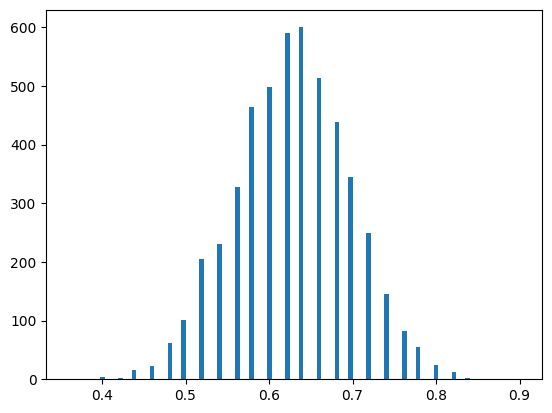

In [189]:
# N -> Número de experimentos con n iteracciones
N =5000
H = Fun_Acierto_Error(N)
plt.hist(H,bins=100)

## **Intervalos de confianza de 95%**

Calcular los intervalos de confianza

$\bar{x} -\frac{S}{\sqrt{N}}t_{N-1,\frac{\alpha}{2}}\leq \mu \leq \bar{x} + \frac{S}{\sqrt{N}}t_{N-1,\frac{\alpha}{2}} $

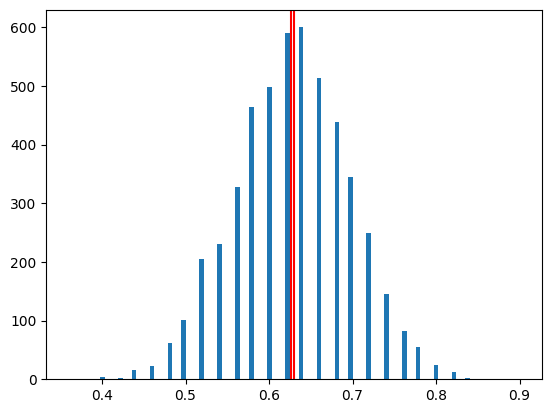

In [190]:
# Confianza -> Nivel de confianza de la prueba (95%)
Confianza = 0.95
# Gl-> Grados de libertad
Gl = len(H) - 1
# Media y desviación estándar de la muestra
media_muestra = np.mean(H)
desviacion_muestra = np.std(H, ddof=1)
# Val_cri ->  Valor crítico de t (a/2,N-1)
Val_cri = stats.t.ppf((1 - Confianza) / 2, Gl)
# e_estandar ->  Error estándar
e_estandar = desviacion_muestra / np.sqrt(len(H))
# Límites del intervalo de confianza
inter_inferior = media_muestra - Val_cri * e_estandar
inter_superior = media_muestra + Val_cri * e_estandar
plt.hist(H,bins=100)
plt.axvline(inter_inferior,color="red")
plt.axvline(inter_superior,color="red")